# Proyecto 1 - Regresión
# Laboratorio de Aprendizaje Estadístico
#### Fecha: 27 de septiembre 2025

#### Integrantes
| Expediente | Nombre                    |
|------------|---------------------------|
| 742594     | Ana Sofía Hinojosa Bale   |
| 739208     | Julia Hernández Cárdenas  |
| 750733     | Sara Hernández            |



In [1]:
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import statsmodels.api as sm

## Objetivos

### Generales

El objetivo principal de este proyecto es analizar y modelar la relación entre las estadísticas de los jugadores de béisbol y su salario, utilizando técnicas de regresión lineal, polinomial y regularizada (Ridge, Lasso y ElasticNet), con el fin de identificar los factores que más influyen en la determinación del salario y evaluar la capacidad predictiva de los distintos modelos.

### Específicos

**1. Analizar el dataset de los jugadores:**
- Comprender el origen de los datos, su estructura, variables y posibles valores faltantes.
- Identificar las variables categóricas y numéricas que serán transformadas para el modelado.

**2. Preparar los datos para el modelado:**
- Modificar las variables categóricas (Liga, División, NewLeague) a formato numérico a través de dummies.
- Escalar las variables numéricas mediante estandarización para garantizar la correcta convergencia de los modelos.
- Eliminar registros con valores faltantes en la variable objetivo (Salario).

**3. Construir modelos de regresión:**
- Ajustar modelos de regresión lineal simple y polinomial (grado 2 y 3) sin penalización.
- Aplicar técnicas de regularización (Ridge, Lasso y ElasticNet) para controlar el sobreajuste y seleccionar variables relevantes.

**4. Evaluar y comparar el desempeño de los modelos:**
- Calcular métricas de desempeño como R² y MSE para conjuntos de entrenamiento y prueba.
- Identificar qué variables y combinaciones polinómicas tienen mayor significancia estadística en la predicción del salario.
- Determinar qué modelo ofrece el mejor equilibrio entre ajuste y capacidad predictiva.

**6. Extraer conclusiones y recomendaciones:**
- Interpretar los coeficientes de los modelos para determinar el impacto de cada estadística en el salario.

## Marco Teórico



- **Regresion lineal**: 

Herramienta estadística que busca una función que explique la relación entre la variable dependiente que se quiere predecir (Y) y la variable, o variables, independientes que se conocen (X). 

En la **regresión lineal simple**, se utiliza una única variable de X para predecir Y. Su fórmula es: $$ Y \approx \beta_0 + \beta_1 X$$


En la **regresión lineal múltiple** se utilizan varios factores de X para predecir Y. 

$$ Y \approx \beta_0 + \beta_1 X1 + \beta_2 X2$$



- **Regresion polinomial:**

Es un modelo que busca encontrar la relación entre las variables independientes y la variable dependiente, cuando esta relación no es lineal. A diferencia de la regresión lineal que ajusta su modelo a una línea recta, la regresión polinomial busca ajustar una curva a los datos. 

Esto se hace elevando las variables independientes a diferentes potencias en el modelo.

$$ Y \approx \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \beta_n X^n$$

- **Interacción de factores:** 

La interacción de factores ocurre cuando una de las variables predictoras depende del nivel de otra de éstas, afectando el resultado de la respuesta. La interacción tiene la característica de ser no-aditiva, esto significa que el resultado que se da de la combinación de dos factores es diferente a cuando se suman individualmente. También son dependientes, haciendo que el impacto que tiene un factor se vea influenciado por la presencia de otro factor.

- **Significancia de factores:**

La singificancia de factores es un concepto estadístico que ayuda a definir si una variable tiene un impacto real sobre otra, o si es simplemente un resultado que se deba al azar o a la muestra específica con la que se hizo el análisis.

Para medir esto, se utiliza el concepto de nivel de significancia, que es la probabilidad de equivocarse en afirmar que si existe relación entre los factores cuando en realidad no la hay. Este usualmente se define con el 0.05, y se dice que un valor es significativo cuando su p-value, o la probabilidad de que el resultado sea un producto del azar, sea menor al valor de significancia.

Se utiliza la hipótesis nula (que se busca rechazar) para decir que no existe relación entre las variables y el resultado. 

La hipótesis alternativa establece que si existe relación entre los datos, pero tiene que haber suficiente evidencia para que se pueda afirmar que es verdadera. 

- **Regularización:**

Busca generalizar los modelos para que se puedan ajustar correctamente a cualquier conjunto de datos, no únicamente a los datos de muestra con los que fueron entrenados.

- **Ridge:**

Es un método de regularización L2 que busca evitar el sobreajuste, penalizando el tamaño de los parámetros en la función de costo, haciendo que los factores puedan crecer únicamente si se reduce proporcionalmente el error. Este tipo de penalización encoge los coeficientes hacia cero, pero no los elimina. 

$$ \text{RSS}_{L2} = \sum_{i=1}^n e_i^2  + \lambda \sum_{j=1}^p \hat{\beta_j}^2 $$

El valor de lambda determina la intensidad de la penalización. Entre más grande sea, más se fuerza al modelo a que sus coeficientes estén muy cercanos al cero.

Ridge sacrifica que el modelo se ajuste perfectamente a los datos de entrenamiento, buscando una mejor generalización para cualquier conjunto de datos desconocidos. 

- **Lasso:**

Al igual que la regularización Ridge, Lasso busca prevenir el sobreajuste del modelo agregando una penalización. 

Esta penalización consiste en sumarle el valor absoluto de los coeficientes a la función de costo que minimiza el modelo. Este tipo de penalización también se llama L1.

$$ \text{RSS}_{L1} = \sum_{i=1}^n e_i^2  + \lambda \sum_{j=1}^p |\hat{\beta_j}| $$

Este proceso hace que sea más probable que los coeficientes de las variables menos importantes se vuelvan 0, eliminándolas automáticamente del modelo y haciendo que éste se simplifique, dejando únicamente al conjunto de factores que tienen un impacto significativo.

- **Elastic Net:**

Es una regularización que combina las penalizaciones L1 y L2 de Lasso y Ridge, resultando en un modelo que le elimina las variables menos relevantes y encoge los coeficientes de las variables restantes. 

## Analisis del Dataset
**¿De dónde viene?**
Los datos provienen de las Grandes Ligas de Béisbol de Estados Unidos, específicamente de las temporadas 1986 y 1987. Se tomaron de la biblioteca StatLib de la Universidad Carnegie Mellon y los salarios fueron originalmente publicados en Sports Illustrated en 1987.

**¿Qué contiene?**
El archivo CSV contiene 322 observaciones de jugadores y 20 variables. Entre ellas, se incluyen estadísticas de 1986: AtBat, Hits, HmRun, Carreras, RBI, Caminatas, Salidas, Asistencias, Errores. Estadísticas de carrera: CAtBat, CHits, CHmRun, CRuns, CRBI, CWalks. E Información categórica: Liga, División, NewLeague. El objetivo: Salario en miles de dólares para 1987.

Las variables son: 

- AtBat – Número de veces al bate en la temporada.
- Hits – Número de hits (conexiones exitosas con la pelota).
- HmRun – Número de home runs en la temporada.
- Runs – Carreras anotadas en la temporada.
- RBI – Runs Batted In: carreras impulsadas por el jugador.
- Walks – Bases por bolas recibidas en la temporada.
- Years – Años de experiencia en Grandes Ligas.
- CAtBat – Total acumulado de veces al bate en la carrera.
- CHits – Total acumulado de hits en la carrera.
- CHmRun – Total acumulado de home runs en la carrera.
- CRuns – Total acumulado de carreras anotadas en la carrera.
- CRBI – Total acumulado de carreras impulsadas en la carrera.
- CWalks – Total acumulado de bases por bolas en la carrera.
- PutOuts – Outs realizados por el jugador en la temporada.
- Assists – Asistencias defensivas realizadas en la temporada.
- Errors – Errores defensivos cometidos en la temporada.
- League_A – Indicador si pertenece a la Liga Americana.
- League_N – Indicador si pertenece a la Liga Nacional.
- Division_E – Indicador si pertenece a la División Este.
- Division_W – Indicador si pertenece a la División Oeste.
- NewLeague_A – Indicador si jugará en la Liga Americana la siguiente temporada.
- NewLeague_N – Indicador si jugará en la Liga Nacional la siguiente temporada.


**¿Qué información dan las muestras?**
Cada fila representa a un jugador y cada columna una característica del desempeño o su información de liga/división. Las muestras nos permiten analizar cómo las estadísticas individuales y acumuladas de los jugadores se relacionan con su salario.

**¿Qué se quiere analizar?**
Se quiere predecir el salario de los jugadores (Salario) usando sus estadísticas como variables explicativas. El objetivo del modelo de regresión es identificar qué factores influyen más en el salario y poder hacer predicciones para jugadores similares.

**¿Qué variables se tienen que transformar para poder usarse en un modelo de regresión?**
- Variables categóricas: Liga, División, NewLeague — codificadas a valores numéricos (0 y 1).
- Variable objetivo: Salario — se eliminaron filas con valores faltantes (NaN).
- Variables numéricas de entrada (X) — se estandarizaron para entrenamiento del modelo usando StandardScaler en x_train y x_test.

**¿Qué transformaciones se van a usar?**
- Codificación de variables categóricas.
- Escalamiento (estandarización) de todas las variables numéricas de entrada (x_train y x_test).
- Eliminación de filas con NaN en Salario para que el modelo pueda entrenar correctamente.

**¿Qué resultado se podría encontrar al realizar una regresión?**
- Coeficientes de regresión que indican el efecto de cada estadística en el salario.
- Evaluación del modelo con R² y MSE para medir ajuste en entrenamiento y prueba.
- Predicciones de salario para jugadores con estadísticas conocidas.
- Identificación de variables importantes y posibles redundancias, útil para entender qué estadísticas impactan más en el salario.

### Descarga de Datos

In [2]:
df = pd.read_csv("Hitters.csv")
df.dropna()
df = df[df['Salary'].notna()] 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64(1), 

In [3]:
data = pd.get_dummies(df, columns = ['League', 'Division', 'NewLeague'])

### Funciones

In [4]:
def datos(data):


    x = data.drop(columns = ['Salary'])
    y = data['Salary']
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state=42)
    scaler = StandardScaler().fit(x_train)
    x_train_scaled = scaler.transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    
    x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns, index=x_train.index)
    x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns, index=x_test.index)
    
    return x_train_scaled, x_test_scaled, y_train, y_test


def var_polinomiales(data, degree):


    poly = PolynomialFeatures(degree=degree, include_bias=False)
    pols = poly.fit_transform(data)
    feature_names = poly.get_feature_names_out(data.columns)
    data_poly = pd.DataFrame(pols, columns=feature_names, index=data.index)
    return data_poly


def datos_polinomiales(data, degree):


    x_train_scaled, x_test_scaled, y_train, y_test = datos(var_polinomiales(data, degree))
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    
    x_train_poly = poly.fit_transform(x_train_scaled)
    x_test_poly = poly.transform(x_test_scaled)
    
    feature_names = poly.get_feature_names_out(x_train_scaled.columns)
    
    x_train_poly = pd.DataFrame(x_train_poly, columns=feature_names, index=x_train_scaled.index)
    x_test_poly = pd.DataFrame(x_test_poly, columns=feature_names, index=x_test_scaled.index)
    
    return x_train_poly, x_test_poly, y_train, y_test


def dataframe_polinomial(degree):


    resultados = sin_penalizacion(data)[2]
    tabla = resultados.summary2().tables[1]
    tabla_filtrada = tabla[tabla['P>|t|'] > 0.2]  # no tomamos mayores a 0.05, sino los 8 valores de p-value mayores
    
    variables = tabla_filtrada.index.tolist()
    data_variables = data[variables]
    
    variables_poly = var_polinomiales(data_variables, degree=degree)
    
    data_nueva = data
    data_nueva = data.drop(columns=variables)
    
    data_nueva_variables = pd.concat([data_nueva, variables_poly], axis=1)
    return data_nueva_variables


def sin_penalizacion(data):


    x_train_scaled, x_test_scaled, y_train, y_test = datos(data)
    
    ols = sm.OLS(y_train, sm.add_constant(x_train_scaled))
    results = ols.fit()
    y_pred_train = results.predict(sm.add_constant(x_train_scaled))
    y_pred = results.predict(sm.add_constant(x_test_scaled))
    
    r2s = r2_score(y_test, y_pred)
    r2s = pd.DataFrame({'R2_test': [r2s]})
    res = results.summary()
    return res, r2s, results, y_pred, y_pred_train, y_test, y_train


def ridge(data, alpha):


    x_train_scaled, x_test_scaled, y_train, y_test = datos(data) 
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train_scaled, y_train)
    y_pred_train = ridge.predict(x_train_scaled)
    r2_train = r2_score(y_train, y_pred_train)
    y_pred = ridge.predict(x_test_scaled)
    r2 = r2_score(y_test, y_pred)

    res = pd.DataFrame({'Variables': x_train_scaled.columns, 'Coeficientes': ridge.coef_})
    r2s = pd.DataFrame({'R2_train': [r2_train], 'R2_test': [r2]})
    return res, r2s, y_pred_train, y_pred, y_train, y_test

def lasso(data, alpha):


    x_train_scaled, x_test_scaled, y_train, y_test = datos(data)
    lasso = Lasso(alpha = alpha, max_iter = 10_000)
    lasso.fit(x_train_scaled, y_train)
    y_pred_train = lasso.predict(x_train_scaled)
    r2_train = r2_score(y_train, y_pred_train)
    y_pred = lasso.predict(x_test_scaled)
    r2 = r2_score(y_test, y_pred)

    res = pd.DataFrame({'Variables': x_train_scaled.columns, 'Coeficientes': lasso.coef_})
    r2s = pd.DataFrame({'R2_train': [r2_train], 'R2_test': [r2]})
    return res, r2s

def elastic_net(data, alpha, ratio):

    
    x_train_scaled, x_test_scaled, y_train, y_test = datos(data)
    
    elastic_net = ElasticNet(alpha=alpha, l1_ratio=ratio, max_iter=10_000)
    elastic_net.fit(x_train_scaled, y_train)
    y_pred_train = elastic_net.predict(x_train_scaled)
    r2_train = r2_score(y_train, y_pred_train)
    y_pred = elastic_net.predict(x_test_scaled)
    r2 = r2_score(y_test, y_pred)

    res = pd.DataFrame({'Variables': x_train_scaled.columns, 'Coeficientes': elastic_net.coef_})
    r2s = pd.DataFrame({'R2_train': [r2_train], 'R2_test': [r2]})
    return res, r2s

def nombres_dataframe(nombres, datos):


    for df, nombre in zip(datos, nombres):
        df["Modelo"] = nombre


### Variables para comparación

In [5]:
data_cuadrada = dataframe_polinomial(2)
data_cubica = dataframe_polinomial(3)

In [6]:
r2_lineal_train = sin_penalizacion(data)[2].rsquared
r2_lineal_test = float(sin_penalizacion(data)[1].values[0,0])

r2_cuadrada_train = sin_penalizacion(data_cuadrada)[2].rsquared
r2_cuadrada_test = float(sin_penalizacion(data_cuadrada)[1].values[0,0])

r2_cubica_train = sin_penalizacion(data_cubica)[2].rsquared
r2_cubica_test = float(sin_penalizacion(data_cubica)[1].values[0,0])

lineal = pd.DataFrame({'R2_train': [r2_lineal_train], 'R2_test': [r2_lineal_test]})
lineal_ridge = ridge(data, 1)[1]
lineal_lasso = lasso(data, 1)[1]
lineal_elastic = elastic_net(data, 1, 0.5)[1]

g2 = pd.DataFrame({'R2_train': [r2_cuadrada_train], 'R2_test': [r2_cuadrada_test]})
g2_ridge = ridge(data_cuadrada, 1)[1]
g2_lasso = lasso(data_cuadrada, 1)[1]
g2_elastic = elastic_net(data_cuadrada, 1, 0.5)[1]

g3 = pd.DataFrame({'R2_train': [r2_cubica_train], 'R2_test': [r2_cubica_test]})
g3_ridge = ridge(data_cubica, 1)[1]
g3_lasso = lasso(data_cubica, 1)[1]
g3_elastic = elastic_net(data_cubica, 1, 0.5)[1]

In [7]:
lineales = [lineal, lineal_ridge, lineal_lasso, lineal_elastic]
grado_2 = [g2, g2_ridge, g2_lasso, g2_elastic]
grado_3 = [g3, g3_ridge, g3_lasso, g3_elastic]

nombres_lineales = ["Regresión lineal sin penalización", 
                    "Regresión lineal con penalización Ridge", 
                    "Regresión lineal con penalización Lasso", 
                    "Regresión lineal con penalización ElasticNet"]

nombres_g2 = ["Regresión grado 2 sin penalización", 
              "Regresión grado 2 con penalización Ridge", 
              "Regresión grado 2 con penalización Lasso", 
              "Regresión grado 2 con penalización ElasticNet"]

nombres_g3 = ["Regresión grado 3 sin penalización", 
              "Regresión grado 3 con penalización Ridge", 
              "Regresión grado 3 con penalización Lasso", 
              "Regresión grado 3 con penalización ElasticNet"]

In [8]:
nombres_dataframe(nombres_lineales, lineales)
r2s_lineales = pd.concat(lineales, axis = 0)
r2s_lineales = r2s_lineales[["Modelo", "R2_train", "R2_test"]]

nombres_dataframe(nombres_g2, grado_2)
r2s_g2 = pd.concat(grado_2, axis = 0)
r2s_g2 = r2s_g2[["Modelo", "R2_train", "R2_test"]]

nombres_dataframe(nombres_g3, grado_3)
r2s_g3 = pd.concat(grado_3, axis = 0)
r2s_g3 = r2s_g3[["Modelo", "R2_train", "R2_test"]]

### Regresión lineal

In [9]:
sin_penalizacion(data)[0]

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     13.12
Date:                Sun, 28 Sep 2025   Prob (F-statistic):           4.36e-24
Time:                        22:08:41   Log-Likelihood:                -1292.1
No. Observations:                 184   AIC:                             2624.
Df Residuals:                     164   BIC:                             2688.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         535.8383     21.185     25.294      0.000     494.008     577.668
AtBat        -191.3439    104.702     -1.828      0.069    -398.082      15.394
Hits          297.1558    109.671      2.710      0.007      80.607     513.705
HmRun          84.9538     64.213      1.323      0.188     -41.837     211.745
Runs          -36.1422     79.797     -0.453      0.651    -193.704     121.419
RBI           -74.9421     73.741     -1.016      0.311    -220.546      70.662
Walks          81.8926     41.687      1.964      0.051      -0.420     164.205
Years          96.4996     67.973      1.420      0.158     -37.716     230.716
CAtBat       -911.7612    386.421     -2.359      0.019   -1674.764    -148.759
CHits         457.4959    535.362      0.855      0.394    -599.594    1514.586
CHmRun         37.7194    177.950      0.212      0.832    -313.648     389.087
CRuns         526.0352    289.992      1.814      0.072     -46.564    1098.634
CRBI          169.5277    288.405      0.588      0.557    -399.938     738.994
CWalks       -163.8521     95.719     -1.712      0.089    -352.853      25.149
PutOuts        87.8384     24.105      3.644      0.000      40.241     135.436
Assists        53.1173     33.528      1.584      0.115     -13.085     119.319
Errors        -13.8171     30.738     -0.450      0.654     -74.511      46.877
League_A      -35.5627     20.839     -1.707      0.090     -76.710       5.584
League_N       35.5627     20.839      1.707      0.090      -5.584      76.710
Division_E     22.0914     11.094      1.991      0.048       0.185      43.998
Division_W    -22.0914     11.094     -1.991      0.048     -43.998      -0.185
NewLeague_A    15.3823     20.484      0.751      0.454     -25.065      55.829
NewLeague_N   -15.3823     20.484     -0.751      0.454     -55.829      25.065
==============================================================================
Omnibus:                        8.366   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.015   Jarque-Bera (JB):               10.475
Skew:                           0.322   Prob(JB):                      0.00531
Kurtosis:                       3.976   Cond. No.                     4.48e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.57e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Análisis de significancia**

In [10]:
tabla = sin_penalizacion(data)[2].summary2().tables[1]
tabla_filtrada = tabla[tabla['P>|t|'] < 0.06]
display(Markdown("#### Factores de modelo sin penalización lineal"))
tabla_filtrada[['Coef.','Std.Err.', 't', 'P>|t|']]

#### Factores de modelo sin penalización lineal

,Coef.,Std.Err.,t,P>|t|
const,535.838250,21.184727,25.293612,1.734893e-58
Hits,297.155825,109.671043,2.709519,7.454154e-03
Walks,81.892627,41.686921,1.964468,5.116571e-02
CAtBat,-911.761166,386.421413,-2.359500,1.947659e-02
PutOuts,87.838446,24.105469,3.643922,3.599557e-04
Division_E,22.091410,11.094461,1.991211,4.811834e-02
Division_W,-22.091410,11.094461,-1.991211,4.811834e-02


In [11]:
ridge(data, 1)[0]

,Variables,Coeficientes
0,AtBat,-199.559388
1,Hits,289.887062
2,HmRun,73.273902
3,Runs,-17.321385
4,RBI,-56.166674
5,Walks,75.590000
6,Years,35.772276
7,CAtBat,-320.705418
8,CHits,140.723455
9,CHmRun,49.719390


In [12]:
lasso(data, 1)[0]

,Variables,Coeficientes
0,AtBat,-2.141244e+02
1,Hits,3.025200e+02
2,HmRun,6.447799e+01
3,Runs,-2.195379e+01
4,RBI,-4.302229e+01
5,Walks,7.246259e+01
6,Years,4.424827e+01
7,CAtBat,-3.928808e+02
8,CHits,2.425419e+01
9,CHmRun,0.000000e+00


In [13]:
elastic_net(data, 1, 0.5)[0]

,Variables,Coeficientes
0,AtBat,15.808969
1,Hits,51.345039
2,HmRun,22.786881
3,Runs,32.841385
4,RBI,16.239586
5,Walks,23.333458
6,Years,16.829502
7,CAtBat,24.185327
8,CHits,37.727043
9,CHmRun,27.412571


#### Comparación de $R^2$

In [14]:
display(Markdown("### $R^2$ de los modelos lineales"))
r2s_lineales

### $R^2$ de los modelos lineales

,Modelo,R2_train,R2_test
0,Regresión lineal sin penalización,0.603260,0.380623
0,Regresión lineal con penalización Ridge,0.594157,0.403631
0,Regresión lineal con penalización Lasso,0.597100,0.404124
0,Regresión lineal con penalización ElasticNet,0.529303,0.353081


### Regresión grado 2

In [15]:
data_cuadrada = dataframe_polinomial(2)
data_cubica = dataframe_polinomial(3)

In [16]:
sin_penalizacion(data_cuadrada)[0]

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     18.45
Date:                Sun, 28 Sep 2025   Prob (F-statistic):           4.69e-40
Time:                        22:08:41   Log-Likelihood:                -1195.6
No. Observations:                 184   AIC:                             2485.
Df Residuals:                     137   BIC:                             2636.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     535.8383     13.718     39.060      0.000     508.711     562.965
AtBat                      56.8659     81.924      0.694      0.489    -105.133     218.865
Hits                      -52.0170     90.656     -0.574      0.567    -231.284     127.250
HmRun                    -154.5649     58.373     -2.648      0.009    -269.993     -39.136
Walks                      17.0232     31.119      0.547      0.585     -44.512      78.558
Years                       3.7296     51.115      0.073      0.942     -97.347     104.807
CAtBat                  -1701.8105    315.094     -5.401      0.000   -2324.887   -1078.734
CRuns                     -19.2089    220.724     -0.087      0.931    -455.676     417.258
CWalks                      1.1541     75.298      0.015      0.988    -147.742     150.050
PutOuts                    79.2295     17.786      4.454      0.000      44.058     114.401
Assists                     6.2955     26.097      0.241      0.810     -45.310      57.901
League_A                  -31.2194     14.719     -2.121      0.036     -60.325      -2.114
League_N                   31.2194     14.719      2.121      0.036       2.114      60.325
Division_E                  8.7520      7.646      1.145      0.254      -6.368      23.872
Division_W                 -8.7520      7.646     -1.145      0.254     -23.872       6.368
Runs                     -171.8894     94.636     -1.816      0.072    -359.026      15.247
RBI                       100.7834     92.482      1.090      0.278     -82.093     283.660
CHits                    1483.6403    348.455      4.258      0.000     794.595    2172.686
CHmRun                    420.4772    222.126      1.893      0.060     -18.763     859.717
CRBI                     -359.3656    417.603     -0.861      0.391   -1185.146     466.415
Errors                     27.8114     40.540      0.686      0.494     -52.355     107.977
NewLeague_A                -0.1302     11.262     -0.012      0.991     -22.400      22.140
NewLeague_N                 0.1302     11.262      0.012      0.991     -22.140      22.400
Runs^2                   -252.3406    164.514     -1.534      0.127    -577.655      72.974
Runs RBI                  790.2563    293.502      2.693      0.008     209.877    1370.636
Runs CHits               1463.2962    588.494      2.487      0.014     299.590    2627.002
Runs CHmRun              1348.0405    510.513      2.641      0.009     338.536    2357.545
Runs CRBI               -2432.6505   1038.505     -2.342      0.021   -4486.223    -379.078
Runs Errors               212.1435     88.772      2.390      0.018      36.603     387.684
Runs NewLeague_A          -41.8250     52.950     -0.790      0.431    -146.530      62.880
Runs NewLeague_N          -96.5824     51.581  

**Análisis de significancia**

In [17]:
tabla = sin_penalizacion(data_cuadrada)[2].summary2().tables[1]
tabla_filtrada = tabla[tabla['P>|t|'] < 0.06]
display(Markdown("#### Factores de modelo sin penalización grado 2"))
tabla_filtrada[['Coef.','Std.Err.', 't', 'P>|t|']]

#### Factores de modelo sin penalización grado 2

,Coef.,Std.Err.,t,P>|t|
const,535.838250,13.718228,39.060311,3.896241e-76
HmRun,-154.564894,58.372915,-2.647887,9.049732e-03
CAtBat,-1701.810487,315.093959,-5.400962,2.847152e-07
PutOuts,79.229536,17.786483,4.454480,1.731491e-05
League_A,-31.219402,14.718682,-2.121073,3.571676e-02
League_N,31.219402,14.718682,2.121073,3.571676e-02
CHits,1483.640300,348.454835,4.257769,3.809349e-05
Runs RBI,790.256285,293.501866,2.692509,7.976805e-03
Runs CHits,1463.296239,588.493696,2.486511,1.410193e-02
Runs CHmRun,1348.040483,510.513215,2.640559,9.237886e-03


In [18]:
ridge(data_cuadrada, 1)[0]

,Variables,Coeficientes
0,AtBat,-69.018819
1,Hits,140.851465
2,HmRun,-84.542601
3,Walks,48.699308
4,Years,-77.229070
5,CAtBat,-414.988389
6,CRuns,309.497035
7,CWalks,-74.573385
8,PutOuts,81.712894
9,Assists,-19.554098


In [19]:
lasso(data_cuadrada, 1)[0]

,Variables,Coeficientes
0,AtBat,0.000000e+00
1,Hits,3.409458e+01
2,HmRun,-9.548441e+01
3,Walks,2.376546e+01
4,Years,-3.652049e+01
5,CAtBat,-1.174362e+03
6,CRuns,1.837732e+02
7,CWalks,-0.000000e+00
8,PutOuts,8.261202e+01
9,Assists,-5.360429e+00


In [20]:
elastic_net(data_cuadrada, 1, 0.5)[0]

,Variables,Coeficientes
0,AtBat,0.854778
1,Hits,29.025143
2,HmRun,0.000000
3,Walks,15.301269
4,Years,4.895961
5,CAtBat,14.887193
6,CRuns,32.643846
7,CWalks,19.960686
8,PutOuts,55.999154
9,Assists,-0.000000


#### Comparación $R^2$

In [21]:
display(Markdown("### $R^2$ de los modelos polinomiales grado 2"))
r2s_g2

### $R^2$ de los modelos polinomiales grado 2

,Modelo,R2_train,R2_test
0,Regresión grado 2 sin penalización,0.861026,0.407619
0,Regresión grado 2 con penalización Ridge,0.799778,0.475286
0,Regresión grado 2 con penalización Lasso,0.825276,0.470247
0,Regresión grado 2 con penalización ElasticNet,0.631365,0.428992


### Grado 3

In [22]:
sin_penalizacion(data_cubica)[0]

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     14.93
Date:                Sun, 28 Sep 2025   Prob (F-statistic):           1.27e-22
Time:                        22:08:41   Log-Likelihood:                -1059.4
No. Observations:                 184   AIC:                             2367.
Df Residuals:                      60   BIC:                             2765.
Df Model:                         123                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            535.8383      9.890     54.177      0.000     516.054     555.622
AtBat                            158.7750    107.340      1.479      0.144     -55.936     373.486
Hits                            -197.9426    129.699     -1.526      0.132    -457.378      61.493
HmRun                             14.9406     78.373      0.191      0.849    -141.829     171.711
Walks                            -12.8007     44.540     -0.287      0.775    -101.894      76.293
Years                            -42.0179     72.506     -0.580      0.564    -187.052     103.017
CAtBat                         -2151.5475    597.148     -3.603      0.001   -3346.021    -957.074
CRuns                           -295.0201    331.463     -0.890      0.377    -958.046     368.005
CWalks                           136.1641    148.644      0.916      0.363    -161.168     433.496
PutOuts                           44.4233     21.467      2.069      0.043       1.482      87.364
Assists                            6.0830     26.762      0.227      0.821     -47.449      59.615
League_A                         -41.1692     16.992     -2.423      0.018     -75.159      -7.180
League_N                          41.1691     16.992      2.423      0.018       7.180      75.159
Division_E                        -2.0504      8.612     -0.238      0.813     -19.277      15.177
Division_W                         2.0504      8.612      0.238      0.813     -15.177      19.277
Runs                            -350.8290    224.975     -1.559      0.124    -800.847      99.189
RBI                              -84.9153    222.644     -0.381      0.704    -530.270     360.439
CHits                           1712.6048    879.221      1.948      0.056     -46.098    3471.308
CHmRun                           721.4778    581.132      1.242      0.219    -440.959    1883.914
CRBI                            -971.2756   1299.291     -0.748      0.458   -3570.246    1627.694
Errors                           178.5498     88.737      2.012      0.049       1.050     356.050
NewLeague_A                       -0.7275     16.191     -0.045      0.964     -33.114      31.659
NewLeague_N                        0.7275     16.191      0.045      0.964     -31.659      33.114
Runs^2                          -322.8954    842.482     -0.383      0.703   -2008.109    1362.319
Runs RBI                        1713.6610   1416.794      1.210      0.231   -1120.348    4547.670
Runs CHits                       293.0028   3409.458      0.086      0.932   -6526.929    7112.934
Runs CHmRun                     -896.6297   2242.963     -0.400      0.691   -5383.224    3589.965
Runs CRBI                        -55.6496   5303.221     -0.010      0.992   -1.07e+04    1.06e+04
Runs Errors   

**Análisis de significancia**

In [23]:
tabla = sin_penalizacion(data_cubica)[2].summary2().tables[1]
tabla_filtrada = tabla[tabla['P>|t|'] < 0.06]
display(Markdown("#### Factores de modelo sin penalización grado 3"))
tabla_filtrada[['Coef.', 'Std.Err.', 't', 'P>|t|']]

#### Factores de modelo sin penalización grado 3

,Coef.,Std.Err.,t,P>|t|
const,535.838250,9.890472,54.177215,1.167337e-52
CAtBat,-2151.547491,597.147665,-3.603041,6.399260e-04
PutOuts,44.423311,21.467394,2.069339,4.282918e-02
League_A,-41.169152,16.992281,-2.422815,1.843607e-02
League_N,41.169137,16.992283,2.422814,1.843612e-02
CHits,1712.604837,879.220517,1.947867,5.611377e-02
Errors,178.549808,88.736854,2.012127,4.870264e-02
Runs NewLeague_A,-211.798558,104.510590,-2.026575,4.715741e-02
Errors NewLeague_N,124.674986,54.764276,2.276575,2.639290e-02
Runs NewLeague_A^2,-211.798556,104.510591,-2.026575,4.715742e-02


In [24]:
ridge(data_cubica, 1)[0]

,Variables,Coeficientes
0,AtBat,-17.262003
1,Hits,67.866510
2,HmRun,-69.656346
3,Walks,33.648582
4,Years,-49.775180
...,...,...
173,Errors NewLeague_N^2,30.153108
174,NewLeague_A^3,13.898360
175,NewLeague_A^2 NewLeague_N,0.000000
176,NewLeague_A NewLeague_N^2,0.000000


In [25]:
lasso(data_cubica, 1)[0]

,Variables,Coeficientes
0,AtBat,0.474711
1,Hits,23.626147
2,HmRun,-67.675944
3,Walks,22.656311
4,Years,-19.801481
...,...,...
173,Errors NewLeague_N^2,0.000000
174,NewLeague_A^3,0.129337
175,NewLeague_A^2 NewLeague_N,0.000000
176,NewLeague_A NewLeague_N^2,0.000000


In [26]:
elastic_net(data_cubica, 1, 0.5)[0]

,Variables,Coeficientes
0,AtBat,2.471654
1,Hits,22.359702
2,HmRun,-11.181716
3,Walks,11.313165
4,Years,2.805896
...,...,...
173,Errors NewLeague_N^2,-0.688813
174,NewLeague_A^3,-0.000000
175,NewLeague_A^2 NewLeague_N,0.000000
176,NewLeague_A NewLeague_N^2,0.000000


#### Comparación $R^2$

In [27]:
display(Markdown("### $R^2$ de los modelos polinomiales grado 3"))
r2s_g3

### $R^2$ de los modelos polinomiales grado 3

,Modelo,R2_train,R2_test
0,Regresión grado 3 sin penalización,0.968363,-1.954720
0,Regresión grado 3 con penalización Ridge,0.875765,0.412473
0,Regresión grado 3 con penalización Lasso,0.860321,0.417089
0,Regresión grado 3 con penalización ElasticNet,0.723480,0.411073


## Comparación de los modelos propuestos

In [28]:
dfs = [lineal, lineal_ridge, 
       lineal_lasso, lineal_elastic, 
       g2, g2_ridge, 
       g2_lasso, g2_elastic, 
       g3, g3_ridge, 
       g3_lasso, g3_elastic]

nombres = ["Lineal", "Lineal con penalización Ridge", 
           "Lineal con penalización Lasso", "Lineal con penalización ElasticNet", 
           "Grado 2", "Grado 2 con penalización Ridge", 
           "Grado 2 con penalización Lasso", "Grado 2 con penalización ElasticNet", 
           "Grado 3", "Grado 3 con penalización Ridge", 
           "Grado 3 con penalización Lasso", "Grado 3 con penalización ElasticNet"]

for df, nombre in zip(dfs, nombres):
    df["Modelo"] = nombre


df_final = pd.concat(dfs, ignore_index=True)
df_final = df_final[["Modelo", "R2_train", "R2_test"]]

display(Markdown("### $R^2$ de los modelos utilizados"))
display(Markdown(df_final.to_markdown(index = False)))


### $R^2$ de los modelos utilizados

| Modelo                              |   R2_train |   R2_test |
|:------------------------------------|-----------:|----------:|
| Lineal                              |   0.60326  |  0.380623 |
| Lineal con penalización Ridge       |   0.594157 |  0.403631 |
| Lineal con penalización Lasso       |   0.5971   |  0.404124 |
| Lineal con penalización ElasticNet  |   0.529303 |  0.353081 |
| Grado 2                             |   0.861026 |  0.407619 |
| Grado 2 con penalización Ridge      |   0.799778 |  0.475286 |
| Grado 2 con penalización Lasso      |   0.825276 |  0.470247 |
| Grado 2 con penalización ElasticNet |   0.631365 |  0.428992 |
| Grado 3                             |   0.968363 | -1.95472  |
| Grado 3 con penalización Ridge      |   0.875765 |  0.412473 |
| Grado 3 con penalización Lasso      |   0.860321 |  0.417089 |
| Grado 3 con penalización ElasticNet |   0.72348  |  0.411073 |

## Pipeline

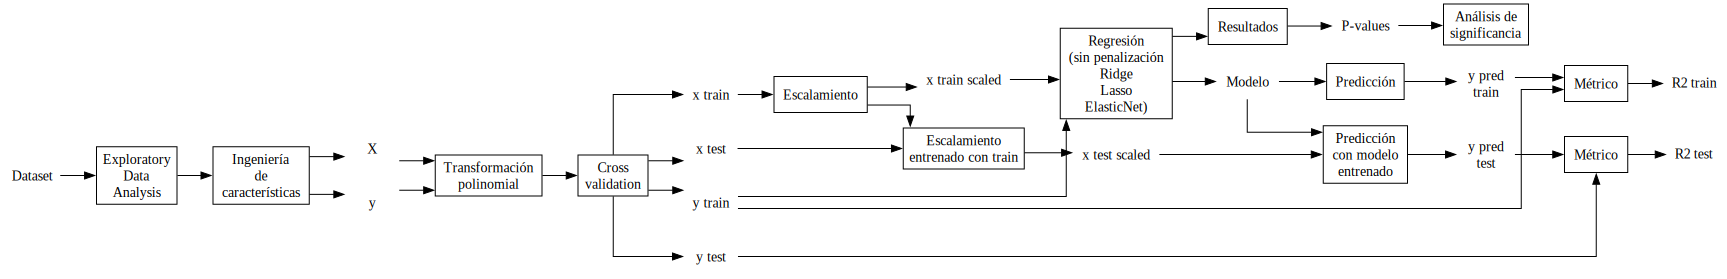

In [1]:
from graphviz import Digraph

dot = Digraph(comment="Pipeline Modelos")
dot.attr(rankdir='LR')
dot.attr(splines='ortho')

dot.node("A", "Dataset", shape = "plaintext")
dot.node("B", "Exploratory\n Data\n Analysis", shape = "box")
dot.node("C", "Ingeniería\n de\n características", shape = "box")
dot.node("AA", "X", shape = "plaintext")
dot.node("BB", "y", shape = "plaintext")
dot.node("E", "Transformación \npolinomial", shape = "box")
dot.node("F", "Cross \nvalidation", shape = "box")
dot.node("G", "x train", shape = "plaintext")
dot.node("H", "x test", shape = "plaintext")
dot.node("I", "y train", shape = "plaintext")
dot.node("U", "y test", shape = "plaintext")
dot.node("J", " Escalamiento", shape = "box")
dot.node("K", " Escalamiento \nentrenado con train", shape = "box")
dot.node("L", " x train scaled", shape = "plaintext")
dot.node("M", " x test scaled", shape = "plaintext")
dot.node("N", " Regresión\n (sin penalización\nRidge\nLasso\nElasticNet)", shape = "box")
dot.node("O", " Modelo", shape = "plaintext")
dot.node("P", " Predicción", shape = "box")
dot.node("V", " Predicción \ncon modelo \nentrenado", shape = "box")
dot.node("Q", " y pred \ntrain", shape = "plaintext")
dot.node("R", " y pred \ntest", shape = "plaintext")
dot.node("W", " Métrico", shape = "box")
dot.node("X", " Métrico", shape = "box")
dot.node("S", "<R<SUP>2</SUP> train>", shape = "plaintext")
dot.node("T", "<R<SUP>2</SUP> test>", shape = "plaintext")
dot.node("Y", " Resultados", shape = "box")
dot.node("CC", " P-values", shape = "plaintext")
dot.node("Z", " Análisis de \nsignificancia", shape = "box")



dot.edges(["AB", "BC"])
dot.edge("C", "AA")
dot.edge("AA", "E")
dot.edge("BB", "E")
dot.edge("C", "BB")
dot.edge("E", "F")
dot.edge("F", "G")
dot.edge("F", "H")
dot.edge("F", "I")
dot.edge("F", "U")
dot.edge("G", "J")
dot.edge("J", "K")
dot.edge("H", "K")
dot.edge("J", "L")
dot.edge("K", "M")
dot.edge("L", "N")
dot.edge("N", "Y")
dot.edge("Y", "CC")
dot.edge("CC", "Z")
dot.edge("N", "O")
dot.edge("O", "P")
dot.edge("P", "Q")
dot.edge("Q", "W")
dot.edge("I", "W", constraint="false")
dot.edge("W", "S")
dot.edge("M", "V")
dot.edge("V", "R")
dot.edge("R", "X")
dot.edge("X", "T")
dot.edge("U", "X", constraint = "false")
dot.edge("O", "V", constraint = "false")
dot.edge("I", "N", constraint = "false")

with dot.subgraph() as s:
    s.attr(rank="same")
    s.node("G")
    s.node("H")
    s.node("I")
    s.node("U")

with dot.subgraph() as s:
    s.attr(rank="same")
    s.node("P")
    s.node("V")


dot



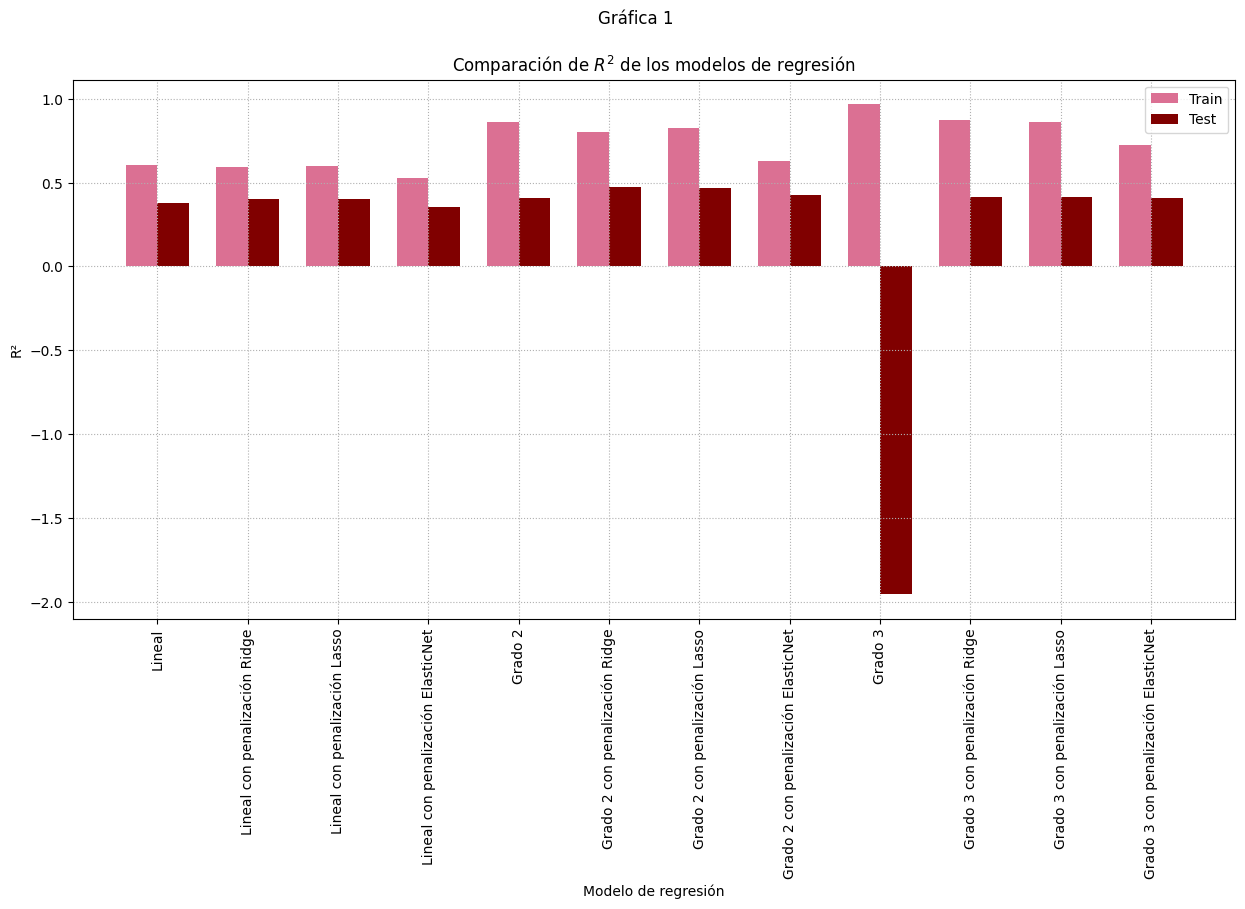

In [29]:
x = np.arange(len(df_final))  
width = 0.35  

plt.figure(figsize=(15,7))

plt.bar(x - width/2, df_final["R2_train"], width, label="Train", color = "palevioletred")
plt.bar(x + width/2, df_final["R2_test"], width, label="Test", color = "maroon")

plt.xticks(x, df_final["Modelo"], rotation=90)
plt.suptitle("Gráfica 1")
plt.title("Comparación de $R^2$ de los modelos de regresión")
plt.xlabel("Modelo de regresión")
plt.ylabel("R²")
plt.legend()
plt.grid(linestyle=":")

In [30]:
mejor_train, mejor_test = ridge(data_cuadrada, 1)[2], ridge(data_cuadrada, 1)[3]
datos_reales_train, datos_reales_test = ridge(data_cuadrada, 1)[4], ridge(data_cuadrada, 1)[5]


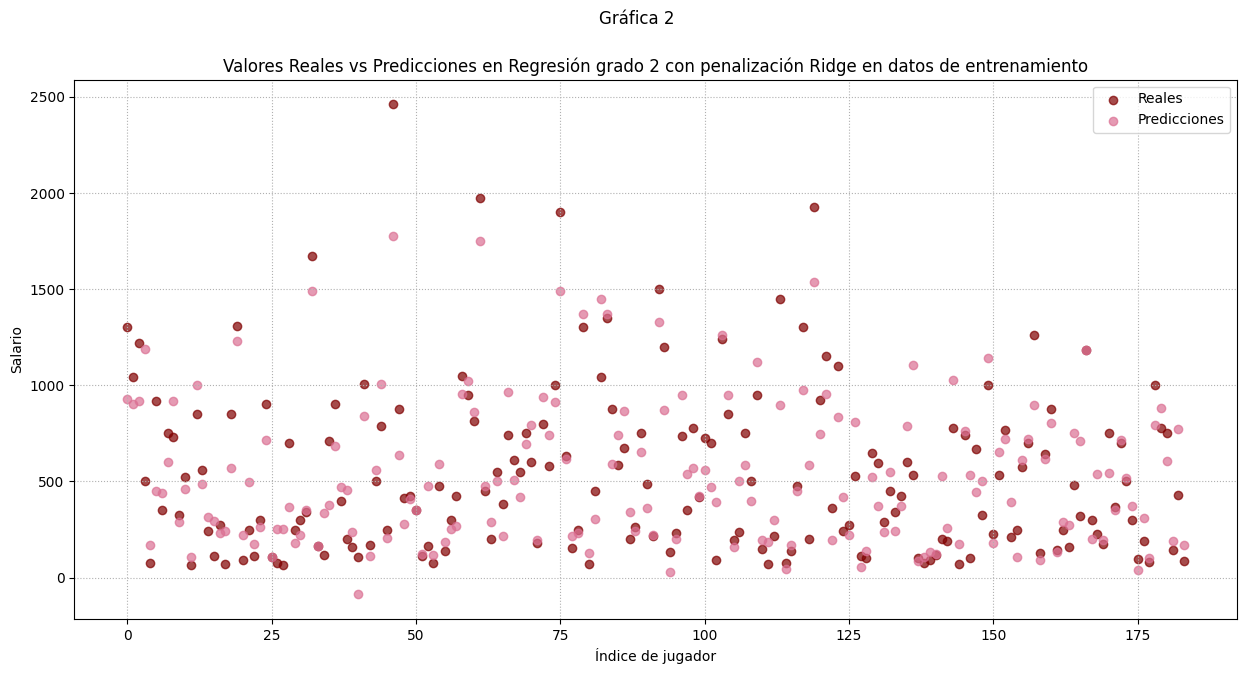

In [31]:
plt.figure(figsize=(15,7))
plt.scatter(range(len(datos_reales_train)), datos_reales_train, 
            color='maroon', label='Reales', alpha = 0.7)

plt.scatter(range(len(mejor_train)), mejor_train, 
            color='palevioletred', label='Predicciones', alpha = 0.7)

plt.xlabel("Índice de jugador")
plt.ylabel("Salario")
plt.title("Valores Reales vs Predicciones en Regresión grado 2 con penalización Ridge en datos de entrenamiento")
plt.suptitle("Gráfica 2")
plt.legend()
plt.grid(linestyle=":")


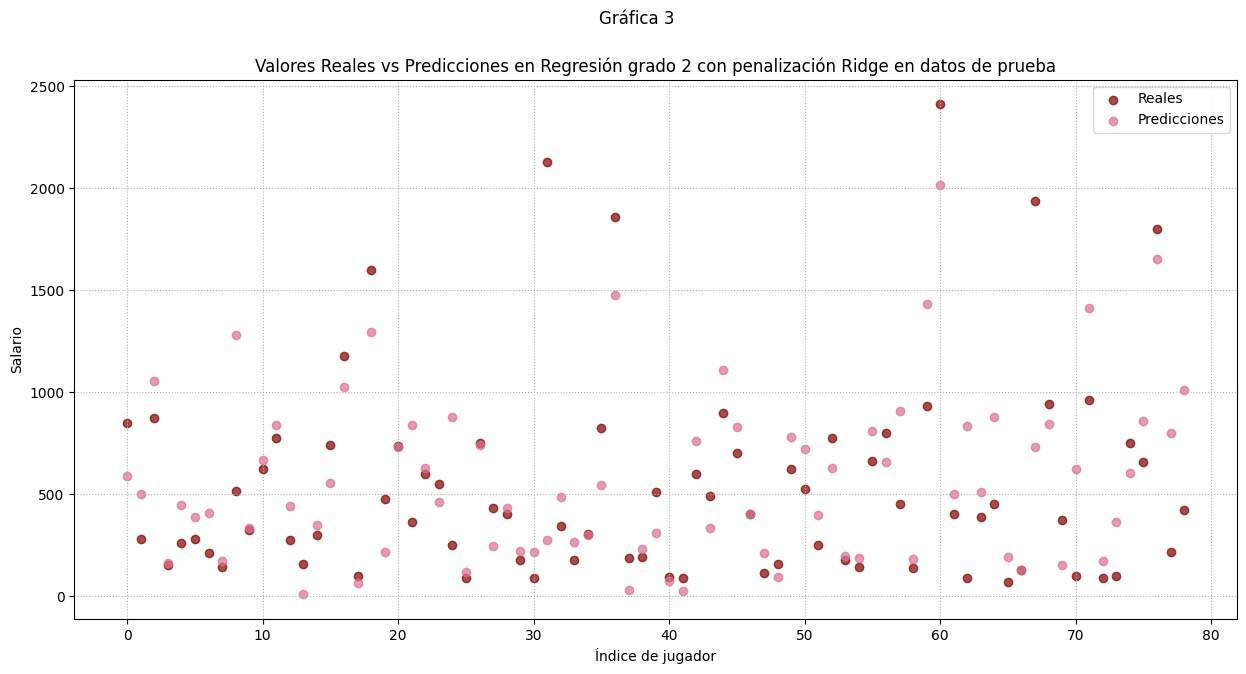

In [32]:
plt.figure(figsize=(15,7))
plt.scatter(range(len(datos_reales_test)), datos_reales_test, 
            color='maroon', label='Reales', alpha = 0.7)

plt.scatter(range(len(mejor_test)), mejor_test, 
            color='palevioletred', label='Predicciones', alpha = 0.7)

plt.xlabel("Índice de jugador")
plt.ylabel("Salario")
plt.title("Valores Reales vs Predicciones en Regresión grado 2 con penalización Ridge en datos de prueba")
plt.suptitle("Gráfica 3")
plt.legend()
plt.grid(linestyle=":")

In [33]:
sobreajuste_train, sobreajuste_test = sin_penalizacion(data_cubica)[4], sin_penalizacion(data_cubica)[3]
datos_reales_train_c, datos_reales_test_c = sin_penalizacion(data_cubica)[6], sin_penalizacion(data_cubica)[5]

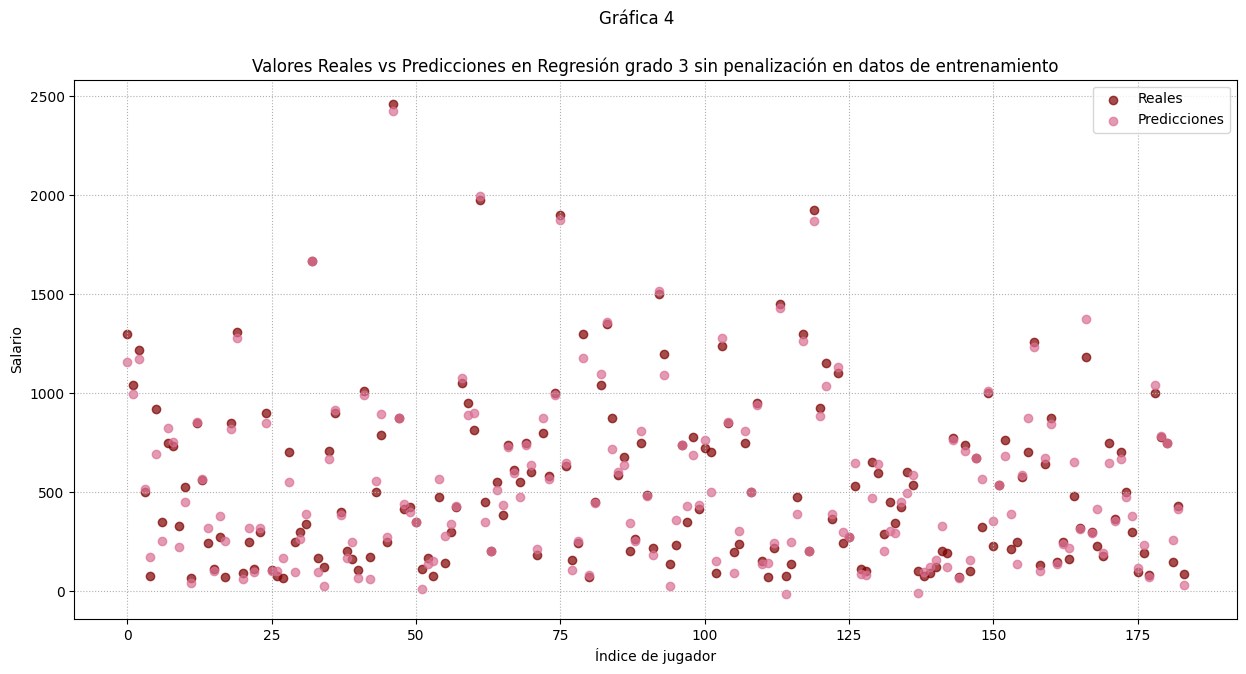

In [34]:
plt.figure(figsize=(15,7))
plt.scatter(range(len(datos_reales_train_c)), datos_reales_train_c, 
            color='maroon', label='Reales', alpha = 0.7)

plt.scatter(range(len(sobreajuste_train)), sobreajuste_train, 
            color='palevioletred', label='Predicciones', alpha = 0.7)

plt.xlabel("Índice de jugador")
plt.ylabel("Salario")
plt.title("Valores Reales vs Predicciones en Regresión grado 3 sin penalización en datos de entrenamiento")
plt.suptitle("Gráfica 4")
plt.legend()
plt.grid(linestyle=":")

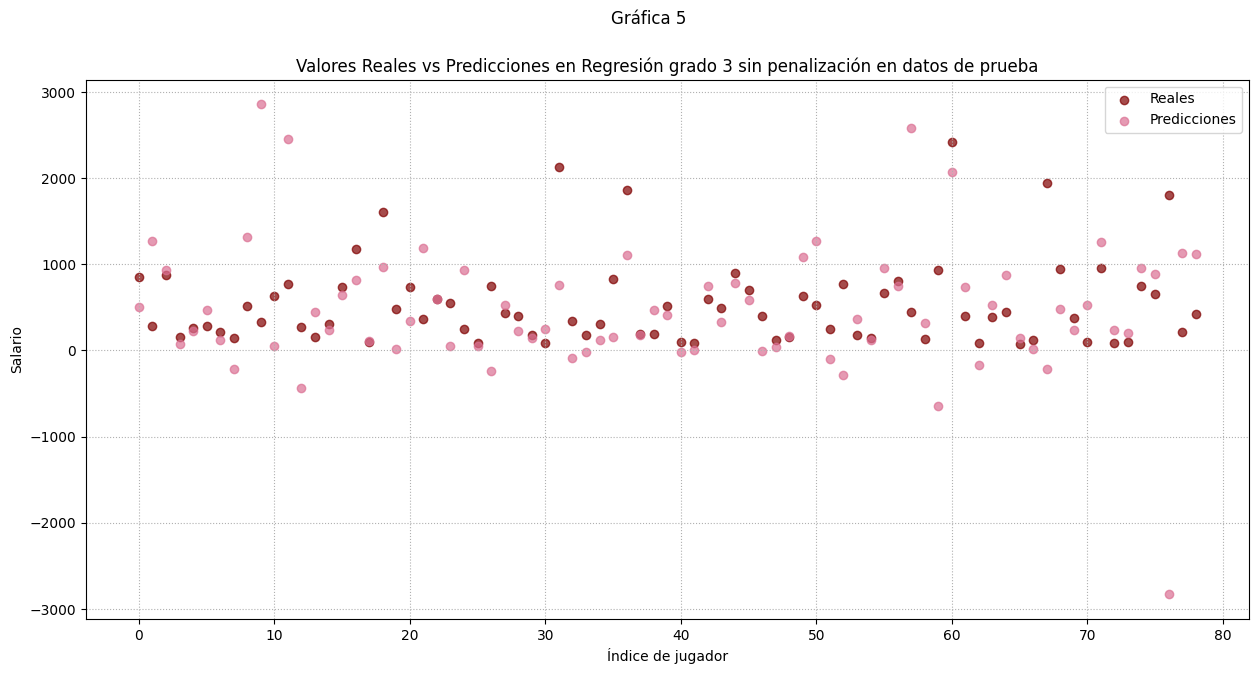

In [35]:
plt.figure(figsize=(15,7))
plt.scatter(range(len(datos_reales_test_c)), datos_reales_test_c, 
            color='maroon', label='Reales', alpha = 0.7)

plt.scatter(range(len(sobreajuste_test)), sobreajuste_test, 
            color='palevioletred', label='Predicciones', alpha = 0.7)

plt.xlabel("Índice de jugador")
plt.ylabel("Salario")
plt.title("Valores Reales vs Predicciones en Regresión grado 3 sin penalización en datos de prueba")
plt.suptitle("Gráfica 5")
plt.legend()
plt.grid(linestyle=":")

## Conclusiones


### Análisis de significancia


Un p-value pequeño sugiere que es muy poco probable que la relación observada entre el predictor y la variable de respuesta se deba únicamente al azar, en caso de que no existiera una asociación real. En otras palabras, el p-value indica la probabilidad de concluir erróneamente que hay una relación cuando en realidad no la hay. 

En la regresión lineal sin penalización, utilizando un criterio de significancia de p-value < 0.05, únicamente seis de las variables independientes resultaron estadísticamente significativas. Esto significa que solo para estas variables se cuenta con evidencia suficiente para afirmar que existe una relación real con el salario. Las variables identificadas fueron las siguientes:


- Cantidad de **hits** realizados por el jugador
- Cantidad de **walks** realizadas por el jugador
- Cantidad de **turnos al bate** acumulados en toda la carrera del jugador
- Cantidad de **put outs** del jugador
- Si se encuentra en la **división E**
- Si se encuentra en la **división W**

En el caso de la regresión polinomial grado 2, 17 de las variables son significativas, y en el caso de la dde grado 3, 11 variables lo son.


### Modelos utilizados

Se realizaron tres modelos utilizando datos de entrenamiento y de prueba, con un tamaño de entrenamiento del 70% y un tamaño de prueba del 30% de los datos totales. Los modelos considerados fueron: lineal, polinomial de grado 2 y polinomial de grado 3. Para cada modelo se aplicaron regularizaciones: Ridge y Lasso, ambas con un valor de $\alpha =1$ tras haber evaluado distintos valores y determinar que este era el más adecuado para nuestros datos; y Elastic Net, con una proporción 50/50 para cada penalización, con el fin de evaluar si este ajuste mejoraba el desempeño del modelo.

### Rendimiento de los modelos

Cabe decir que, en realidad ninguno de los modelos propuestos tuvo un buen rendimiento. Se concluyó que el mejor modelo fue la regresión polinomial de grado 2 con penalización de Ridge porque, a pesar de que se sacrificó un poco el ajuste con los datos de entrenamiento (con un $R^2$ de 0.7998), los resultados con los datos de prueba tuvieron el $R^2$ más alto (0.4753), el ajuste de este modelo se puede ver en las gráficas 2 y 3. Esto quiere decir que el mejor modelo propuesto solo pudo explicar el 47.53% de la varianza de los datos de prueba.  A su vez, la penalización de Lasso de este mismo modelo tuvo también, en comparación al resto de modelos, un buen desempeño, teniendo un $R^2$ de entrenamiento de 0.8253 y 0.470247 de prueba, muy cercano al resultado de Ridge.

### Overfitting

Hubo algunos casos en los que los modelos presentaron un sobreajuste considerable a los datos de entrenamiento. Un claro ejemplo es la regresión polinomial de grado 3 sin penalización, ilustrada en las gráficas 4 y 5. La primera de ellas muestra la comparación entre los datos reales de entrenamiento y las predicciones generadas para dichos datos. Ahí, el modelo alcanza un $R^2$ de 0.968363, lo que a primera vista sugiere un excelente ajuste. Sin embargo, al evaluar el mismo modelo sobre los datos de prueba, se observa que no generaliza adecuadamente: el $R^2$ cae a -1.95472. Tal como se aprecia en la gráfica 5, las predicciones difieren notablemente de los valores reales que deberían estimarse, evidenciando el problema de sobreajuste.


### Conclusiones generales

Aun así, se pudo llevar a cabo el objetivo general, que era analizar y modelar la relación entre las estadísticas de los jugadores de béisbol y su salario, utilizando técnicas de regresión lineal, polinomial y regularizada (Ridge, Lasso y ElasticNet), con el fin de identificar los factores que más influyen en la determinación del salario y evaluar la capacidad predictiva de los distintos modelos. Los resultados obtenidos permitieron observar cómo diferentes métodos de modelado afectan la precisión de las predicciones y destacaron la importancia de seleccionar adecuadamente las variables y la forma de regularización, especialmente en contextos donde existen relaciones no lineales o multicolinealidad entre las características. Esto aporta una comprensión más profunda de los determinantes del salario y ofrece herramientas útiles para la toma de decisiones basadas en datos en el ámbito deportivo.

A continuación se muestran las variables significativas que más influyen de manera positiva al salario del jugador de beisbol:

  - Regresión lineal sin penalización

    - Hits: Número de hits conseguidos por el jugador en la temporada actual
    - PutOuts: Veces que un jugador completa un out de manera directa.

  - Regresión polinomial grado 2 sin penalización
    - RBI CRBI: Cantidad de carreras que un jugador ha impulsado con sus batazos durante esa temporada por total acumulado de carreras impulsadas por el jugador a lo largo de toda su carrera profesional (hasta la temporada previa.
    - CHits: Número total de hits que un jugador ha conseguido a lo largo de toda su carrera profesional, hasta la temporada previa.
    - Runs CHits: Número de carreras anotadas por el jugador en la temporada actual por número total de hits (imparables) acumulados en la carrera completa del jugador hasta la temporada previa.
  - Regresión polinomial grado 3 sin penalización: 
    - CHits: Número total de hits que un jugador ha conseguido a lo largo de toda su carrera profesional, hasta la temporada previa.
    - Errors: Número de errores cometidos por el jugador en la temporada actual.



## Referencias

Scikit-learn developers. (2023). sklearn.preprocessing.PolynomialFeatures. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

Seabold, S., & Perktold, J. (2025). statsmodels.regression.linear_model.OLS. Statsmodels. https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html

Scikit-learn developers. (2023). sklearn.metrics.r2_score. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

IPython Development Team. (2025). IPython.display — IPython API. https://ipython.org/ipython-doc/stable/api/generated/IPython.display.html

MathChi. (2018). Hitters Baseball Data. Kaggle. https://www.kaggle.com/datasets/mathchi/hitters-baseball-data

Regresión Lineal. (n.d.). MathWorks. https://la.mathworks.com/discovery/linear-regression.html

¿Qué es una interacción? - Minitab. (n.d.-b). (C) Minitab, LLC. All Rights Reserved. 2025. https://support.minitab.com/es-mx/minitab/help-and-how-to/statistical-modeling/anova/supporting-topics/anova-models/what-is-an-interaction/

Rubén Fernández Casal (ruben.fcasal@udc.es), Julián Costa Bouzas (julian.costa@udc.es), & Manuel Oviedo de la Fuente (manuel.oviedo@udc.es). (n.d.-b). 6.1 Métodos de regularización | Métodos predictivos de aprendizaje estadístico. https://rubenfcasal.github.io/aprendizaje_estadistico/shrinkage.html

Tutorial de Lasso y regresión Ridge en Python. (2024b, May 3). Datacamp. https://www.datacamp.com/es/tutorial/tutorial-lasso-ridge-regression

Regresión Ridge | Interactive Chaos. (n.d.-b). https://interactivechaos.com/es/manual/tutorial-de-machine-learning/regresion-ridge

Elastic Net | Interactive Chaos. (n.d.-b). https://interactivechaos.com/es/manual/tutorial-de-machine-learning/elastic-net